# SEM for SF OTU tests v 0.04

In [1]:
# Import packagaes
library(ggplot2)
library(RColorBrewer)
library(reshape2)
library(corrplot)


suppressMessages(library(Hmisc))
suppressMessages(library(cowplot))
theme_set(theme_grey())              # 

corrplot 0.84 loaded


# Import data sets

In [2]:
# Read import module for testing convenience here, still a bit of mucking around in pre-processing
source("Import_SalOTU_dat_Plot_test_v0.1.R")

In [3]:
# Imported metadata
head(Meta_iTag)

,Sample,EWsiteHyd_index,MG_name,Index,Location,Pl_Sp,EWcoastGroup,SALTgroup,LU,Depth,⋯,Ca_pw,Sr_pw,Mg_pw,Na_pw,K_pw,Al_pw,Si_pw,Br_pw,F_pw,CH4_logn1
Sandmound_TuleA_D1,Sandmound_TuleA_D1,1,Sandmound_TuleA_D1,2,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.6840787
Sandmound_TuleA_D2,Sandmound_TuleA_D2,2,Sandmound_TuleA_D2,85,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,51564.87,254.07,25081.42,114758.7,NA,25.25,10496.08,1.4380,0.4030,0.6840787
Sandmound_TuleB_D1,Sandmound_TuleB_D1,3,Sandmound_TuleB_D1,3,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275,-1.1222873
Sandmound_TuleB_D2,Sandmound_TuleB_D2,4,Sandmound_TuleB_D2,86,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275,-1.1222873
Sandmound_TuleC_D1,Sandmound_TuleC_D1,5,Sandmound_TuleC_D1,4,Sandmound,Tule,SF_Ref,FW,Ref,d1,⋯,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460,0.1086608
Sandmound_TuleC_D2,Sandmound_TuleC_D2,6,Sandmound_TuleC_D2,87,Sandmound,Tule,SF_Ref,FW,Ref,d2,⋯,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460,0.1086608


In [4]:
# Imported OTU table
# head(otu_V)

In [5]:
# Get delta sites
### Generate separate Delta sites metadata
# Separate Delta Sites (oligo and FW)
#levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <-rbind(Meta_iTag_FW, Meta_iTag_Oligo)
#Meta_iTag_Delta

Delta_sites <-data.frame(Meta_iTag_Delta[,"Sample"])                 # DF of Delta sites
colnames(Delta_sites) [1] <- "Sample"                                # Rename column "Sample"
#Delta_sites["Samp_Index"] <- seq(1:nrow(Delta_sites))                # Make sample index for reordering post-merges
# Delta_sites

### Import guild function 

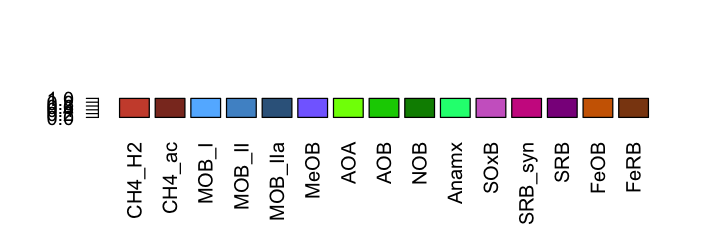

In [6]:
source("OTU_subsetting_modules_v.0.2_strip.R")
# options(repr.plot.width=1.5, repr.plot.height=6) 

In [7]:
Guild_OTUs <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
dim(Guild_OTUs); head(Guild_OTUs)

[1] 813   2

,Guild,OTU
otu_4420,CH4_H2,otu_4420
otu_196,CH4_H2,otu_196
otu_2086,CH4_H2,otu_2086
otu_2109,CH4_H2,otu_2109
otu_1614,CH4_H2,otu_1614
otu_1912,CH4_H2,otu_1912


## Get Guild counts/sample data

In [8]:
otu_V["OTU"] <- row.names(otu_V)                 # Make OTU number column


In [9]:
# merge otu table and Guilds 
OTU_guilds <- merge(Guild_OTUs, otu_V, by="OTU")#, all.y=TRUE)
head(OTU_guilds)

OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
otu_1018,MeOB,54.66913,249.34647,0.0000,378.86561,118.0791,414.5159,868.71367,1181.3479,⋯,0.000000,35.553786,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Rhodocyclales;f__Rhodocyclaceae;g__Methyloversatilis,Bacteria,Proteobacteria,Betaproteobacteria,Rhodocyclales,Rhodocyclaceae,Methyloversatilis,Betaproteobacteria
otu_1019,SRB,0.00000,16.08687,0.0000,0.00000,0.0000,0.0000,15.79479,0.0000,⋯,8.807236,0.000000,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfobacterales;f__Desulfobulbaceae;g__DesulfobulbaceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfobacterales,Desulfobulbaceae,DesulfobulbaceaeFA,Deltaproteobacteria
otu_1028,SRB_syn,984.04442,1230.64549,894.4544,1310.24358,1180.7909,1399.9687,971.37983,917.1956,⋯,8.807236,35.553786,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__SyntrophobacteraceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Syntrophobacteraceae,SyntrophobacteraceaeFA,Deltaproteobacteria
otu_103,SRB_syn,359.25431,136.73839,0.0000,63.14427,342.4294,117.3158,1879.58049,821.8072,⋯,0.000000,7.110757,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Desulfobacteraceae;g__DesulfobacteraceaeFA,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Desulfobacteraceae,DesulfobacteraceaeFA,Deltaproteobacteria
otu_1034,SRB_syn,0.00000,0.00000,0.0000,0.00000,0.0000,0.0000,0.00000,0.0000,⋯,0.000000,0.000000,k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Syntrophobacter,Bacteria,Proteobacteria,Deltaproteobacteria,Syntrophobacterales,Syntrophobacteraceae,Syntrophobacter,Deltaproteobacteria
otu_1048,FeRB,0.00000,0.00000,894.4544,0.00000,0.0000,0.0000,0.00000,0.0000,⋯,0.000000,0.000000,k__Bacteria;p__Firmicutes;c__Clostridia;o__Thermoanaerobacterales;f__ThermoanaerobacteralesOR;g__ThermoanaerobacteralesOR,Bacteria,Firmicutes,Clostridia,Thermoanaerobacterales,ThermoanaerobacteralesOR,ThermoanaerobacteralesOR,Firmicutes


In [10]:
## Get C guilds
Firmic <- otu_V[subset(otu_V["Phylum"]=="Firmicutes"),]     # Firmicutes
Firmic['Guild'] <-"Firmic" 

Actino <- otu_V[subset(otu_V["Phylum"]=="Actinobacteria"),] 
Actino['Guild'] <-"Actino" 

Chlorf <- otu_V[subset(otu_V["Phylum"]=="Chloroflexi"),] 
Chlorf['Guild'] <-"Chlorf" 

C_guilds <- rbind(Firmic, Actino, Chlorf)
#C_guilds

In [11]:
# Get agg_by_cat function from corr module
source("Corr_ranks_module_v0.3.2_strip.R")


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [12]:
Guild_agg <- agg_by_cat(OTU_guilds, "Guild")     # aggregate by Guild
head(Guild_agg)

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
CH4_H2,CH4_H2,1772.8419,2219.9879,894.4544,2146.9051,1109.9434,1556.3898,2487.680061,1871.0790,1428.5856,⋯,0.000000,49.267671,0.0000,15.26974,0.000000,0.00000,18.332366,0.0000,0.00000,14.221514
CH4_ac,CH4_ac,296.7753,571.0839,0.0000,410.4377,118.0791,312.8422,371.177660,205.4518,208.3354,⋯,0.000000,14.076478,0.0000,15.26974,7.712538,0.00000,6.110789,215.8895,0.00000,7.110757
MOB_I,MOB_I,11964.7306,10914.9407,15205.7245,16985.8083,8088.4176,12576.2553,18242.987111,10030.4509,3263.9213,⋯,1224.261673,858.665128,2851.8466,1351.37199,38.562691,41.10355,24.443154,863.5579,79.26512,725.297230
MOB_II,MOB_II,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.897397,0.0000,0.0000,⋯,0.000000,7.038239,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.00000,0.000000
MOB_IIa,MOB_IIa,9824.8245,11574.5023,2683.3631,12644.6398,8607.9656,13350.5397,13907.316149,22225.4834,9226.2820,⋯,8.871461,49.267671,0.0000,30.53948,0.000000,8.22071,36.664732,0.0000,26.42171,234.654986
MeOB,MeOB,6279.1406,4834.1042,2683.3631,7529.9541,4664.1240,4974.1905,9192.570129,5693.9502,7698.4891,⋯,204.043612,42.229433,221.8103,30.53948,131.113151,0.00000,494.973876,0.0000,61.65065,184.879686


In [13]:
C_guild_agg <- agg_by_cat(C_guilds, "Guild")
C_guild_agg

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
Actino,Actino,38932.234,24210.738,38461.54,21011.255,35612.653,26450.806,36588.640,72473.126,53988.631,⋯,32558.26,33206.41,55753.60,34211.85,49082.594,18578.80,48470.775,18782.383,36532.42,16155.640
Chlorf,Chlorf,50772.006,71892.218,57245.08,51809.873,49971.071,53003.285,62918.562,60725.685,49673.112,⋯,38280.36,55074.22,40773.48,40037.26,28760.055,65625.92,21778.851,43393.782,35264.17,56338.529
Firmic,Firmic,5755.879,5517.796,14311.27,8003.536,4333.503,7954.012,6610.121,5033.569,7222.294,⋯,6857.64,18869.52,10852.86,12513.55,1758.459,2893.69,1698.799,5829.016,3663.81,2979.407


In [14]:
Guild_agg2 <-rbind(Guild_agg, C_guild_agg)
Guild_agg2

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
CH4_H2,CH4_H2,1772.8419,2219.98793,894.4544,2146.9051,1109.9434,1556.38980,2487.680061,1871.07899,1428.5856,⋯,0.000000e+00,4.926767e+01,0.0000,15.26974,0.000000e+00,0.00000,1.833237e+01,0.0000,0.00000,1.422151e+01
CH4_ac,CH4_ac,296.7753,571.08385,0.0000,410.4377,118.0791,312.84217,371.177660,205.45181,208.3354,⋯,0.000000e+00,1.407648e+01,0.0000,15.26974,7.712538e+00,0.00000,6.110789e+00,215.8895,0.00000,7.110757e+00
MOB_I,MOB_I,11964.7306,10914.94068,15205.7245,16985.8083,8088.4176,12576.25528,18242.987111,10030.45089,3263.9213,⋯,1.224262e+03,8.586651e+02,2851.8466,1351.37199,3.856269e+01,41.10355,2.444315e+01,863.5579,79.26512,7.252972e+02
MOB_II,MOB_II,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,7.897397,0.00000,0.0000,⋯,0.000000e+00,7.038239e+00,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0.0000,0.00000,0.000000e+00
MOB_IIa,MOB_IIa,9824.8245,11574.50231,2683.3631,12644.6398,8607.9656,13350.53965,13907.316149,22225.48336,9226.2820,⋯,8.871461e+00,4.926767e+01,0.0000,30.53948,0.000000e+00,8.22071,3.666473e+01,0.0000,26.42171,2.346550e+02
MeOB,MeOB,6279.1406,4834.10416,2683.3631,7529.9541,4664.1240,4974.19052,9192.570129,5693.95018,7698.4891,⋯,2.040436e+02,4.222943e+01,221.8103,30.53948,1.311132e+02,0.00000,4.949739e+02,0.0000,61.65065,1.848797e+02
AOA,AOA,20274.4391,15950.13071,12522.3614,19211.6438,21419.5468,21859.84671,7068.170331,5877.38929,15962.4599,⋯,2.750153e+03,1.009283e+04,475.3078,16697.46064,2.614550e+03,2046.95669,2.749855e+02,3454.2314,1409.15776,4.223790e+03
AOB,AOB,0.0000,16.08687,0.0000,0.0000,0.0000,15.64211,7.897397,0.00000,0.0000,⋯,4.524445e+02,1.280959e+03,261.4193,1557.51348,7.481162e+02,49.32426,9.166183e+01,0.0000,290.63879,1.919904e+02
NOB,NOB,44461.6262,68562.23607,33989.2665,78930.3361,44846.4381,78789.30080,41816.717210,34919.47023,36498.3780,⋯,1.011347e+03,3.772496e+03,269.3411,3748.72116,1.287994e+03,616.55322,2.444315e+02,3454.2314,1629.33866,2.865635e+03
Anamx,Anamx,117.1481,96.52121,2683.3631,126.2885,177.1186,54.74738,71.076573,73.37565,109.1281,⋯,9.669893e+02,2.927907e+03,435.6988,2091.95437,1.928135e+02,4151.45835,1.527697e+02,2374.7841,836.68742,2.758974e+03


In [56]:
## LOG 2 Guild data
Guild_agg2 <- Guild_agg2[,-1]                          # drop guild col
Guild_agg2 <- replace(Guild_agg2, Guild_agg2==0, 2)    # replace 0s 
Guild_agg_L2 <- log10(Guild_agg2)                       # log2

# transpose
Guild_aggT <- data.frame(t(Guild_agg_L2))
# Guild_aggT

In [57]:
# Transpose Guild agg 
#Guild_aggd <- Guild_agg[,-1]              # drop first col, Guilds redund w rownames
#Guild_aggT <- data.frame(t(Guild_aggd))               # Transpose


#dim(Guild_aggT); head(Guild_aggT) #length(row.names(Guild_aggT))

In [58]:
head(Guild_aggT);
#max(Guild_aggT[,])

,CH4_H2,CH4_ac,MOB_I,MOB_II,MOB_IIa,MeOB,AOA,AOB,NOB,Anamx,SOxB,SRB_syn,SRB,FeOB,FeRB,Actino,Chlorf,Firmic
Sandmound_TuleA_D2,3.346351,2.756700,4.038021,0.301030,4.063502,3.684316,4.202764,1.206472,4.836085,1.984623,3.567254,4.924350,4.720355,3.655950,3.649735,4.384008,4.856682,3.741766
Sandmound_TuleB_D1,2.951558,0.301030,4.182007,0.301030,3.428679,3.428679,4.097686,0.301030,4.531342,3.428679,3.905801,4.832372,5.136250,3.729709,3.992951,4.585027,4.757738,4.155678
Sandmound_TuleB_D2,3.331813,2.613247,4.230086,0.301030,4.101906,3.876792,4.283565,0.301030,4.897244,2.101364,3.753368,5.022985,4.835964,3.819450,3.889355,4.322452,4.714413,3.903282
Sandmound_TuleC_D1,3.045301,2.072173,3.907864,0.301030,3.934901,3.668770,4.330810,0.301030,4.651728,2.248264,3.262505,4.773568,4.284361,3.199278,3.657634,4.551604,4.698719,3.636839
Sandmound_TuleC_D2,3.192118,2.495325,4.099551,0.301030,4.125499,3.696722,4.339647,1.194295,4.896467,1.738363,3.544543,4.932481,4.624209,3.675021,3.846058,4.422439,4.724303,3.900586
Sandmound_CattailA_D1,3.395795,2.569582,4.261096,0.897484,4.143243,3.963437,3.849307,0.897484,4.621350,1.851726,3.718342,4.989045,4.694336,3.525873,4.007737,4.563346,4.798779,3.820209


In [59]:
#colMeans(Guild_aggT)
#Guild_aggT1000 = Guild_aggT/1000   # Divide OTU counts by 1000 for lavaan
#colMeans(Guild_aggT1000)

### add CH4 data

In [60]:
#Guild_aggT <- Guild_aggT1000 

In [61]:
Guild_aggT$Sample <- row.names(Guild_aggT)

In [62]:
# names(Meta_iTag)

In [63]:
### Reimport metadata instead

metaDB <- read.table("SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep='\t', header=T)
# metaDB <- read.table("SF_sal_metaLOG_FIX2.txt", sep='\t', header=T)

In [64]:
head(metaDB); names(metaDB)

X,EWsiteHyd_index,Sample,MG_name,Index,Location,Pl_Sp,EWcoastGroup,SALTgroup,LU,⋯,Zn_pw,Ca_pw,Sr_pw,Mg_pw,Na_pw,K_pw,Al_pw,Si_pw,Br_pw,F_pw
0,1,Sandmound_TuleA_D1,Sandmound_TuleA_D1,2,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,51564.87,254.07,25081.42,114758.7,NA,25.25,10496.08,1.4380,0.4030
1,2,Sandmound_TuleA_D2,Sandmound_TuleA_D2,85,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,51564.87,254.07,25081.42,114758.7,NA,25.25,10496.08,1.4380,0.4030
2,3,Sandmound_TuleB_D1,Sandmound_TuleB_D1,3,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275
3,4,Sandmound_TuleB_D2,Sandmound_TuleB_D2,86,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,59069.71,258.94,26016.80,96669.1,NA,20.63,12043.69,1.4965,0.4275
4,5,Sandmound_TuleC_D1,Sandmound_TuleC_D1,4,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460
5,6,Sandmound_TuleC_D2,Sandmound_TuleC_D2,87,Sandmound,Tule,SF_Ref,FW,Ref,⋯,NA,77352.15,508.07,51492.04,238099.6,371.64,21.33,11216.38,2.0160,0.1460


[1] "X"                "EWsiteHyd_index"  "Sample"           "MG_name"         
 [5] "Index"            "Location"         "Pl_Sp"            "EWcoastGroup"    
 [9] "SALTgroup"        "LU"               "Depth"            "EW.no"           
[13] "iTag_name.x"      "Site_indx"        "Salinity.x"       "Bulk_dens"       
[17] "H2O_FPS"          "CO2_mg_m2_h"      "CO2_soilC_mg_g_d" "CH4_ug_m2_h"     
[21] "CH4_CO2"          "CH4_soilC_ug_g_d" "pH"               "Cl"              
[25] "SO4"              "Corg_LOI"         "C"                "N"               
[29] "P"                "NO3_N"            "NH4_N"            "Olsen_P"         
[33] "CN"               "CP"               "NP"               "NP_ext"          
[37] "NO3_NH4"          "C_g_m2"           "N_g_m2"           "P_g_m2"          
[41] "Fe"               "Mn"               "Cu"               "Zn"              
[45] "Salinity.y"       "CO2_mg_m2_h.1"    "CH4_ug_m2_h.1"    "Cl_pw"           
[49] "SO4_pw"           "DOC_mg_L"         "NO2_pw"           "NO3_pw"          
[53] "NH3_pw"           "PO4_pw"           "Fe_pw"            "Mn_pw"           
[57] "Co_pw"            "Cu_pw"            "Zn_pw"            "Ca_pw"           
[61] "Sr_pw"            "Mg_pw"            "Na_pw"            "K_pw"            
[65] "Al_pw"            "Si_pw"            "Br_pw"            "F_pw"

In [65]:
# Get only numeric data
metaCHEM <- metaDB[,15:ncol(metaDB)]                                             # should use lapply
metaCHEM_log <-log10(metaCHEM)                                                   # log10 chem
CH4_logn1 <- log10(metaDB[,"CH4_ug_m2_h"]- (min(metaDB[,"CH4_ug_m2_h"])*1.05))   # CH4 logn1
metaCHEM_log["CH4_logn1"] <- CH4_logn1                                           # to metachemLOg
#metaCHEM_log

Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”Warning message in lapply(X = x, FUN = .Generic, ...):
“NaNs produced”

In [66]:
# reattach non-numeric
metaDB = data.frame(metaDB[,1:14], metaCHEM_log)
#metaDB

In [67]:
# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Reorder location factor
Meta_iTag$Location <-factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))  #head(Meta_iTag)
Meta_iTag$Pl_Sp <-factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]
colnames(Meta_iTag)
#head(Meta_iTag)
#max(Meta_iTag$CH4_ug_m2_h)
#plot(x=Meta_iTag$Sample, y=Meta_iTag$CH4_ug_m2_h)

[1] "Sample"           "X"                "EWsiteHyd_index"  "MG_name"         
 [5] "Index"            "Location"         "Pl_Sp"            "EWcoastGroup"    
 [9] "SALTgroup"        "LU"               "Depth"            "EW.no"           
[13] "iTag_name.x"      "Site_indx"        "Salinity.x"       "Bulk_dens"       
[17] "H2O_FPS"          "CO2_mg_m2_h"      "CO2_soilC_mg_g_d" "CH4_ug_m2_h"     
[21] "CH4_CO2"          "CH4_soilC_ug_g_d" "pH"               "Cl"              
[25] "SO4"              "Corg_LOI"         "C"                "N"               
[29] "P"                "NO3_N"            "NH4_N"            "Olsen_P"         
[33] "CN"               "CP"               "NP"               "NP_ext"          
[37] "NO3_NH4"          "C_g_m2"           "N_g_m2"           "P_g_m2"          
[41] "Fe"               "Mn"               "Cu"               "Zn"              
[45] "Salinity.y"       "CO2_mg_m2_h.1"    "CH4_ug_m2_h.1"    "Cl_pw"           
[49] "SO4_pw"           "DOC_mg_L"         "NO2_pw"           "NO3_pw"          
[53] "NH3_pw"           "PO4_pw"           "Fe_pw"            "Mn_pw"           
[57] "Co_pw"            "Cu_pw"            "Zn_pw"            "Ca_pw"           
[61] "Sr_pw"            "Mg_pw"            "Na_pw"            "K_pw"            
[65] "Al_pw"            "Si_pw"            "Br_pw"            "F_pw"            
[69] "CH4_logn1"

In [68]:
CH4_samp <- c("Sample", "CH4_ug_m2_h", 'CO2_mg_m2_h', 'H2O_FPS','CH4_CO2', 'NO3_N', 'NH4_N', 
              'DOC_mg_L','NO2_pw','NO3_pw', 'NH3_pw', 'C', 'NP', 'NP_ext', "NH4_N", "NO3_N", "P", 
              "CH4_logn1", "C_g_m2", "Bulk_dens", 'Salinity.x', 'CN')  # not for log data, already been logn1 transf: "CH4_logn1", 
CH4 <- Meta_iTag[,CH4_samp]
#CH4
Guild_CH4_d <- merge(CH4, Guild_aggT)
dim(Guild_CH4_d); head(Guild_CH4_d)

#max(Guild_CH4_d$CH4_ug_m2_h)
# CH4

[1] 167  40

Sample,CH4_ug_m2_h,CO2_mg_m2_h,H2O_FPS,CH4_CO2,NO3_N,NH4_N,DOC_mg_L,NO2_pw,NO3_pw,⋯,NOB,Anamx,SOxB,SRB_syn,SRB,FeOB,FeRB,Actino,Chlorf,Firmic
Browns_ThreeSqA_D1,0.472344434,1.0551785,1.871870,-1.582834,-0.3665315,1.214314,1.021603,0.2273724,NA,⋯,4.731602,3.335711,3.182175,4.711374,4.272210,3.576920,4.220456,4.449531,4.629739,3.944111
Browns_ThreeSqA_D2,0.472344434,1.0551785,1.863437,-1.582834,-0.3767507,1.455302,1.021603,0.2273724,NA,⋯,4.741942,2.207916,3.749821,4.903169,4.831884,4.120808,4.059971,4.432213,4.684533,4.126767
Browns_ThreeSqB_D1,0.005190917,0.5645034,1.876980,-1.559312,-0.4202164,1.390405,1.300161,NA,NA,⋯,4.698198,3.495390,3.140202,4.714113,4.273208,3.823043,4.235117,4.508179,4.586147,3.846351
Browns_ThreeSqB_D2,0.005190917,0.5645034,1.844697,-1.559312,-0.6020600,1.142076,1.300161,NA,NA,⋯,4.800698,2.474580,3.557595,4.913072,5.039095,4.188624,4.123459,4.196934,4.702576,3.924042
Browns_ThreeSqC_D1,NaN,0.0823678,1.872576,NaN,-0.3767507,1.200303,1.282169,NA,NA,⋯,4.756507,3.265093,3.263476,4.792900,4.461887,3.818064,4.391161,4.459932,4.646782,4.079123
Browns_ThreeSqC_D2,NaN,0.0823678,1.846370,NaN,-0.2218487,1.283301,1.282169,NA,NA,⋯,4.810407,2.925999,3.687320,4.763188,4.949504,4.193376,4.216033,4.010230,4.594352,4.021076


## Get only delta sites

In [69]:
## Get only delta sites
Guild_CH4_d <- merge(Guild_CH4_d, Delta_sites)


In [70]:
head(Guild_CH4_d); colnames(Guild_CH4_d)

Sample,CH4_ug_m2_h,CO2_mg_m2_h,H2O_FPS,CH4_CO2,NO3_N,NH4_N,DOC_mg_L,NO2_pw,NO3_pw,⋯,NOB,Anamx,SOxB,SRB_syn,SRB,FeOB,FeRB,Actino,Chlorf,Firmic
Browns_ThreeSqA_D1,0.472344434,1.0551785,1.871870,-1.582834,-0.3665315,1.214314,1.021603,0.2273724,NA,⋯,4.731602,3.335711,3.182175,4.711374,4.272210,3.576920,4.220456,4.449531,4.629739,3.944111
Browns_ThreeSqA_D2,0.472344434,1.0551785,1.863437,-1.582834,-0.3767507,1.455302,1.021603,0.2273724,NA,⋯,4.741942,2.207916,3.749821,4.903169,4.831884,4.120808,4.059971,4.432213,4.684533,4.126767
Browns_ThreeSqB_D1,0.005190917,0.5645034,1.876980,-1.559312,-0.4202164,1.390405,1.300161,NA,NA,⋯,4.698198,3.495390,3.140202,4.714113,4.273208,3.823043,4.235117,4.508179,4.586147,3.846351
Browns_ThreeSqB_D2,0.005190917,0.5645034,1.844697,-1.559312,-0.6020600,1.142076,1.300161,NA,NA,⋯,4.800698,2.474580,3.557595,4.913072,5.039095,4.188624,4.123459,4.196934,4.702576,3.924042
Browns_ThreeSqC_D1,NaN,0.0823678,1.872576,NaN,-0.3767507,1.200303,1.282169,NA,NA,⋯,4.756507,3.265093,3.263476,4.792900,4.461887,3.818064,4.391161,4.459932,4.646782,4.079123
Browns_ThreeSqC_D2,NaN,0.0823678,1.846370,NaN,-0.2218487,1.283301,1.282169,NA,NA,⋯,4.810407,2.925999,3.687320,4.763188,4.949504,4.193376,4.216033,4.010230,4.594352,4.021076


[1] "Sample"      "CH4_ug_m2_h" "CO2_mg_m2_h" "H2O_FPS"     "CH4_CO2"    
 [6] "NO3_N"       "NH4_N"       "DOC_mg_L"    "NO2_pw"      "NO3_pw"     
[11] "NH3_pw"      "C"           "NP"          "NP_ext"      "NH4_N.1"    
[16] "NO3_N.1"     "P"           "CH4_logn1"   "C_g_m2"      "Bulk_dens"  
[21] "Salinity.x"  "CN"          "CH4_H2"      "CH4_ac"      "MOB_I"      
[26] "MOB_II"      "MOB_IIa"     "MeOB"        "AOA"         "AOB"        
[31] "NOB"         "Anamx"       "SOxB"        "SRB_syn"     "SRB"        
[36] "FeOB"        "FeRB"        "Actino"      "Chlorf"      "Firmic"

In [71]:
#Guild_CH4_d$CH4_logn1

In [72]:
#plot_matrix(Guild_CH4_d)

# BASIC SEM TESTS

In [73]:
# load libraries and functions
library(lavaan)
library(AICcmodavg)    

In [74]:
library("stringr") 
#library("lavaan") 
library("DiagrammeR") 
library("dplyr") 
library("semPlot")

In [ ]:
# "Simple model"  

# meth_mod <- 'CH4_logn1 ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I
#meth_mod <- 'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h +DOC_mg_L

meth_mod <- 'CH4_logn1 ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h +DOC_mg_L

             CH4_ac ~ DOC_mg_L + CO2_mg_m2_h + SRB
             CH4_H2 ~ SRB_syn + CO2_mg_m2_h
             MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
             MOB_I ~ CH4_H2 +CH4_ac
             CH4_ug_m2_h ~~ MOB_IIa
             SRB_syn ~ CH4_H2'
             #   CH4_ac ~ SRB +FeRB
             #CH4_logn1 ~NOB
             #CH4_logn1 ~AOA
             #CH4_ac ~~ CH4_H2
             #SRB ~~ SRB_syn'
             #CH4_logn1 ~~ CH4_ac'

In [ ]:
# "Simple model w dropping NS"  

# meth_mod <- 'CH4_logn1 ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I
#meth_mod <- 'CH4_ug_m2_h ~  CH4_ac + CH4_H2 + MOB_IIa + MOB_I + CO2_mg_m2_h +DOC_mg_L
#meth_mod <- 'CH4_ug_m2_h ~  0*CH4_ac + 0*CH4_H2 + MOB_IIa + 0*MOB_I + CO2_mg_m2_h +DOC_mg_L

meth_mod <- 'CH4_logn1 ~  0*CH4_ac + 0*CH4_H2 + MOB_IIa + 0*MOB_I + 0*CO2_mg_m2_h +0*DOC_mg_L

             CH4_ac ~ DOC_mg_L + CO2_mg_m2_h + 0*SRB
             CH4_H2 ~ SRB_syn + CO2_mg_m2_h + 0*SRB
             MOB_IIa ~ NOB + AOA + 0*AOB +CH4_H2 +CH4_ac
             MOB_I ~ CH4_H2 + CH4_ac'
             #AOA ~~ MOB_I
             #AOA ~~ SRB_syn'
#CO2_mg_m2_h 
             #AOA ~ CO2_mg_m2_h'
             

             #MOB_I ~~ CH4_ac + MOB_IIa
             #MOB_IIa ~~ CH4_ac   
             #CH4_ac ~~ CH4_H2'            


            # CH4_ug_m2_h ~~ MOB_IIa
            # SRB_syn ~~ CH4_H2
            # CH4_H2 ~~ CH4_ac' 
             #   CH4_ac ~ SRB +FeRB
             #CH4_logn1 ~NOB
             #CH4_logn1 ~AOA
             #CH4_ac ~~ CH4_H2
             #SRB ~~ SRB_syn'
             #CH4_logn1 ~~ CH4_ac'

In [ ]:
# Latent model2
#meth_mod <- #'CH4_logn1 ~ CH4 + ox
meth_mod <-   'CH4_ug_m2_h ~ CH4 + ox + CO2_mg_m2_h
               CH4 =~ CH4_ac + CH4_H2 
               ox =~ lambda*MOB_IIa + lambda*MOB_I
               MOB_IIa ~ NOB + AOA + AOB +CH4_H2 +CH4_ac
               MOB_I ~ CH4_H2 +CH4_ac'    
#CH4_ac ~ SRB +FeRB
             #CH4_H2 ~ SRB_syn'
#             
#            

In [ ]:
# Composite model
meth_mod <- 'CH4_ug_m2_h ~ CH4 + ox 
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h
              ox  <~ 1*MOB_IIa + MOB_I
              MOB_IIa ~ NOB + AOA + AOB + CH4_H2 +CH4_ac
       
              CH4_H2 ~ CO2_mg_m2_h + SRB_syn'
             #MOB_I ~ CH4_H2 +CH4_ac'    
#CH4_ac ~ SRB +FeRB
             #CH4_H2 ~ SRB_syn'
#             
#            

In [ ]:
# Composite model2
meth_mod <- 'CH4_logn1 ~ CH4 + ox 
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~ 1*MOB_IIa + MOB_I
              MOB_IIa ~ NOB + AOA + AOB + CH4_H2 +CH4_ac
              CH4_H2 ~ CO2_mg_m2_h + SRB_syn
  
              CH4_ac ~ SRB +FeRB + CO2_mg_m2_h + DOC_mg_L
              CH4_ac~~CH4_H2'
#              CH4~~ox'
             #CH4_H2 ~ SRB_syn'
#                          #MOB_I ~ CH4_H2 +CH4_ac'  
#            

In [75]:
# Composite model3 - simpler than below 3a 

meth_mod <- 'CH4_logn1 ~ CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h
              CH4_ac ~ +SRB_syn + CO2_mg_m2_h + DOC_mg_L              
              MOB_IIa ~ NOB + AOA + 0*AOB 
              CH4_ac~~CH4_H2' 
# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [103]:
# Composite model3a1 - simpler than below 3a, adding soil 

meth_mod <- 'CH4_logn1 ~ CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I 
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h + H2O_FPS
              CH4_ac ~ +SRB_syn + CO2_mg_m2_h + DOC_mg_L + H2O_FPS             
              MOB_IIa ~ NOB + AOA + 0*AOB + H2O_FPS + CN
              CH4_ac~~CH4_H2
              AOA ~ CN
              AOB ~ CN
              NOB ~ CN'
              
# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [99]:
# Composite model3a2 - simpler than below 3a, adding soil, MOD INDICES for Cov 

meth_mod <- 'CH4_logn1 ~ CH4 + ox 
         
              CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I 
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h  + H2O_FPS + NP
              CH4_ac ~ + SRB_syn + CO2_mg_m2_h + DOC_mg_L  + H2O_FPS + NP   
              MOB_IIa ~ NOB + AOA + 0*AOB + H2O_FPS
              AOA ~ CN'
     

              #CH4_logn1 ~~ CH4_H2 + CH4_ac +  MOB_IIa + AOA + AOB + NOB'

#         AOB ~ CN
#              NOB ~ CN

In [ ]:
# Composite model3a -  

meth_mod <- 'CH4_logn1 ~ CH4 + ox 
         
CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h
              CH4_ac ~ FeRB +SRB_syn + SRB + CO2_mg_m2_h + DOC_mg_L              
              MOB_IIa ~ NOB + AOA + 0*AOB + CH4_H2 +0*CH4_ac
              CH4_ac~~CH4_H2' 
# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [ ]:
# Composite model3b -  
# Incorporating mod indices covariances
meth_mod <- 'CH4_logn1 ~ CH4 + ox 
         
CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
              ox  <~  1*MOB_IIa + 0*MOB_I
              CH4_H2 ~ SRB_syn +CO2_mg_m2_h
              CH4_ac ~ FeRB +SRB_syn + SRB + CO2_mg_m2_h + DOC_mg_L              
              MOB_IIa ~ NOB + AOA + 0*AOB + CH4_H2 +0*CH4_ac
              CH4_ac~~CH4_H2
              CH4_logn1 ~~ CH4_H2 + CH4_ac + MOB_IIa
              MOB_IIa ~~ CH4_H2 + CH4_ac' 
# MOB_I ~~ MOB_IIa'
# AOA ~ CN

In [104]:
meth_mod.sem <- sem(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

In [105]:
fitMeasures(meth_mod.sem, c("gfi", "cfi", "rni"))   # Intersting, in CFA says this is more important than X2

gfi   cfi   rni 
0.999 0.613 0.613

In [106]:
summary(meth_mod.sem, standardized=TRUE, rsq=TRUE, fit.measures=TRUE) # Get summary w. r2, std. coef

lavaan (0.5-23.1097) converged normally after 253 iterations

  Number of observations                            72

  Estimator                                         ML      Robust
  Minimum Function Test Statistic              320.154     327.438
  Degrees of freedom                                43          43
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.978
    for the Satorra-Bentler correction

Model test baseline model:

  Minimum Function Test Statistic              778.734     838.650
  Degrees of freedom                                63          63
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.613       0.633
  Tucker-Lewis Index (TLI)                       0.433       0.463

  Robust Comparative Fit Index (CFI)                         0.614
  Robust Tucker-Lewis Index (TLI)       

In [81]:
mi2 <- modindices(meth_mod.sem); 
print(mi2[mi2$mi > 10,])

            lhs op         rhs           mi    mi.scaled       epc   sepc.lv
20      MOB_IIa  ~         AOB   472650.919   482885.747   -48.243   -48.243
102   CH4_logn1 ~~      CH4_H2   614217.223   627517.541   -22.782   -22.782
103   CH4_logn1 ~~      CH4_ac    24328.060    24854.863     5.169     5.169
104   CH4_logn1 ~~     MOB_IIa   307153.910   313805.050   -19.575   -19.575
105   CH4_logn1 ~~         AOA    10042.028    10259.479     4.604     4.604
106      CH4_H2 ~~      CH4_ac  1310274.468  1338647.275   -24.374   -24.374
107      CH4_H2 ~~     MOB_IIa 14448807.359 14761683.202    86.262    86.262
108      CH4_H2 ~~         AOA    21012.669    21467.680     4.279     4.279
109      CH4_ac ~~     MOB_IIa   792795.847   809963.123   -23.036   -23.036
110      CH4_ac ~~         AOA     9008.495     9203.565    -3.194    -3.194
111     MOB_IIa ~~         AOA    98342.587   100472.106    14.914    14.914
124      CH4_H2  ~   CH4_logn1   154736.384   158087.060   -29.786   -29.786

In [82]:
fit <- lavaan:::sem(meth_mod, data = Guild_CH4_d, std.lv = TRUE)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: could not compute standard errors!
  lavaan NOTE: this may be a symptom that the model is not identified.
”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

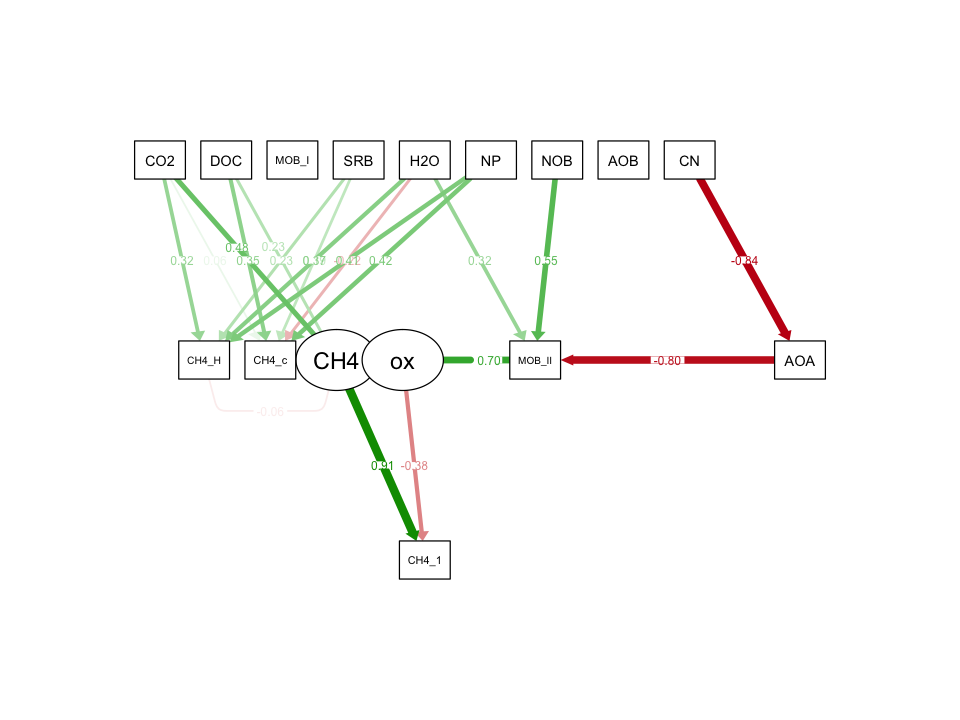

In [83]:
options(repr.plot.width=8, repr.plot.height=6) 
semPaths(fit, "std", style = "lisrel", layout='tree2', optimizeLatRes=TRUE, residuals=FALSE, 
         curvePivot = TRUE, exoCov=F)#, filetype="pdf", filename="PrintSEM_test_CO2")#, label.scale=F, node.height=10)



## CO2 model

In [ ]:
# CO2 model
#meth_mod <- 'CO2_mg_m2_h ~ DOC_mg_L + Firmic + Actino + Chlorf'
meth_mod <- 'CO2_mg_m2_h ~ DOC_mg_L + Firmic + Actino + Chlorf + C + Bulk_dens + NP + NP_ext +
             NH4_N+ NO3_N + C_g_m2 + Bulk_dens +  Salinity.x +NH3_pw + P'

### DCMP models

In [ ]:
# DCMP model 
#meth_mod <- 'CH4_logn1 ~ CH4 + ox 
 #             CH4 <~ 1*CH4_ac + CH4_H2 + CO2_mg_m2_h + DOC_mg_L
#              ox  <~ 1*MOB_IIa + 0*MOB_I'

meth_mod <- 'CH4_logn1 ~ CH4 + ox 
              CH4 <~ 1*CH4_ac + 0*CH4_H2
              ox  <~ 1*MOB_IIa + 0*MOB_I
              
              DCMP ~  C + NP_ext
              DCMP =~ CO2_mg_m2_h + DOC_mg_L
              CH4 ~ DCMP

              MOB_IIa ~ NOB + AOA + 0*AOB + CH4_H2 +CH4_ac
              CH4_H2 ~ CO2_mg_m2_h + SRB_syn
              CH4_ac ~ FeRB + CO2_mg_m2_h + DOC_mg_L +SRB_syn + 0*SRB
              CH4_ac~~CH4_H2'


#0*C + 0*Bulk_dens + 0*NP + NP_ext + 0*NH4_N

#'DCMP <~ C + NP + NP_ext + NH4_N'
#             DCMP ~ DOC_mg_L 
#             CO2_mg_m2_h ~ DCMP'


In [212]:
meth_mod <- 'CH4_logn1 ~ CH4 + ox 
              DCMP =~ CO2_mg_m2_h + DOC_mg_L + C + NP + NP_ext + NH4_N 
              CH4 <~ 1*CH4_ac + CH4_H2 + DCMP 
              ox  <~ 1*MOB_IIa + 0*MOB_I 
              DCMP ~ Bulk_dens + NP + NP_ext  
              CH4_ac ~ DCMP + DOC_mg_L 
              CH4_H2 ~ DCMP + DOC_mg_L 
              MOB_IIa ~ AOA + AOB + NOB
              MOB_IIa ~~ CH4_ac'

# Run SEM / diagnostics / plot

In [213]:
#meth_mod.sem <- cfa(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm")    # Generates observed var > 1000 x warning, divide otu vas try again
meth_mod.sem <- sem(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)
# meth_mod.sem <- cfa(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", std.lv = TRUE)# Generates observed var > 1000 x warning, divide otu vas try again

Warning message in lav_partable_check(lavpartable, categorical = lavoptions$categorical, :
“lavaan WARNING: missing intercepts are set to zero: [CH4 ox]”

In [214]:
# Where error message arises, check variances in vartable...
#varTable(meth_mod.sem)

In [215]:
#meth_mod.sem <- sem(meth_mod, data=Guild_CH4_d, fixed.x=FALSE, estimator ="mlm", orthogonal=TRUE)

In [216]:
# Extract measures of interest                      # want > 0.95 
fitMeasures(meth_mod.sem, c("gfi", "cfi", "rni"))   # Intersting, in CFA says this is more important than X2

gfi   cfi   rni 
0.981 0.486 0.486

In [217]:
#summary(meth_mod.sem)                             # Get summary
#summary(meth_mod.sem, standardized=TRUE, rsq=TRUE) # Get summary w. r2, std. coef
summary(meth_mod.sem, standardized=TRUE, rsq=TRUE, fit.measures=TRUE) # Get summary w. r2, std. coef

lavaan (0.5-23.1097) converged normally after 196 iterations

  Number of observations                            72

  Estimator                                         ML      Robust
  Minimum Function Test Statistic              753.943     809.959
  Degrees of freedom                                74          74
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.931
    for the Satorra-Bentler correction

Model test baseline model:

  Minimum Function Test Statistic             1417.364    1562.056
  Degrees of freedom                                95          95
  P-value                                        0.000       0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.486       0.498
  Tucker-Lewis Index (TLI)                       0.340       0.356

  Robust Comparative Fit Index (CFI)                         0.485
  Robust Tucker-Lewis Index (TLI)       

In [205]:
# Compare R2 to lm, basically identical
# lmtest <- lm(CH4_logn1~CH4_ac+CH4_H2+MOB_IIa+MOB_I + NOB, data= Guild_CH4_d)
# summary(lmtest)

In [206]:
# look for missing links using modindices
mi2 <- modindices(meth_mod.sem); 
print(mi2[mi2$mi > 10.0,])

            lhs op         rhs           mi    mi.scaled       epc  sepc.lv
3          DCMP =~ CO2_mg_m2_h  2425204.063  2619699.275 34563.643 6401.095
96  CO2_mg_m2_h ~~           C    11891.435    12845.098     0.265    0.265
98  CO2_mg_m2_h ~~      NP_ext       33.700       36.403     0.055    0.055
99  CO2_mg_m2_h ~~       NH4_N       36.206       39.110     0.062    0.062
100 CO2_mg_m2_h ~~   CH4_logn1      155.421      167.886     0.446    0.446
101 CO2_mg_m2_h ~~      CH4_ac      228.556      246.886     0.322    0.322
102 CO2_mg_m2_h ~~      CH4_H2      755.670      816.273     0.471    0.471
105    DOC_mg_L ~~          NP       17.261       18.645     0.020    0.020
108    DOC_mg_L ~~   CH4_logn1       90.726       98.002     0.382    0.382
111    DOC_mg_L ~~     MOB_IIa      277.941      300.231    -0.453   -0.453
112           C ~~          NP   299926.904   323980.281     0.761    0.761
113           C ~~      NP_ext   658297.685   711091.489     2.820    2.820
114         

In [207]:
library(corrplot)

In [208]:
plot_matrix <- function(matrix_toplot){
corrplot(matrix_toplot, is.corr = FALSE, 
               type = 'lower', 
               order = "original", 
               tl.col='black', tl.cex=.75)
}

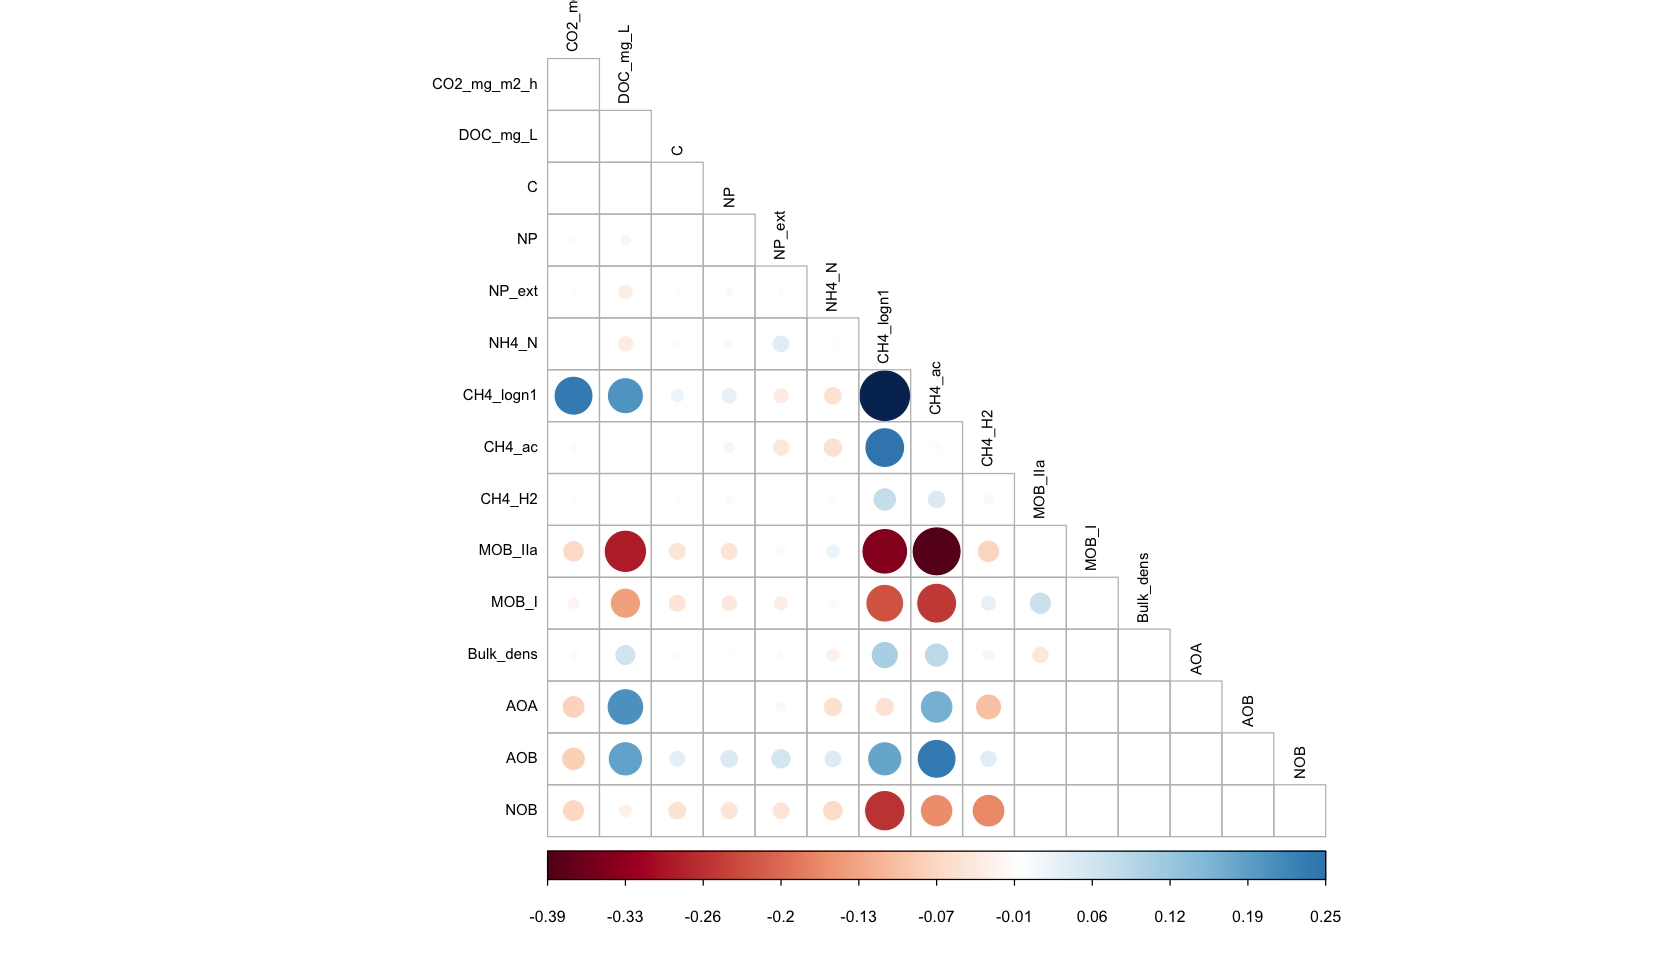

In [209]:
plot_matrix(residuals(meth_mod.sem)$cov)

In [210]:
fit <- lavaan:::sem(meth_mod, data = Guild_CH4_d, std.lv = TRUE)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: could not compute standard errors!
  lavaan NOTE: this may be a symptom that the model is not identified.
”Warning message in lav_object_post_check(object):
“lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use inspect(fit,"cov.lv") to investigate.”

Called from: .local(object, ...)
debug: if (is.null(pars$group)) pars$group <- ""
debug: pars$group <- ""
debug: semModel@Pars <- data.frame(label = pars$label, lhs = ifelse(pars$op == 
    "~" | pars$op == "~1", pars$rhs, pars$lhs), edge = "--", 
    rhs = ifelse(pars$op == "~" | pars$op == "~1", pars$lhs, 
        pars$rhs), est = pars$est, std = pars$std.all, group = pars$group, 
    fixed = list$free[list$op != "=="] == 0, par = list$free[list$op != 
        "=="], stringsAsFactors = FALSE)
debug: semModel@Pars$edge[pars$op == "~~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~*~"] <- "<->"
debug: semModel@Pars$edge[pars$op == "~"] <- "~>"
debug: semModel@Pars$edge[pars$op == "=~"] <- "->"
debug: semModel@Pars$edge[pars$op == "~1"] <- "int"
debug: semModel@Pars$edge[grepl("\\|", pars$op)] <- "|"
debug: semModel@Thresholds <- semModel@Pars[grepl("\\|", semModel@Pars$edge), 
    -(3:4)]
debug: semModel@Pars <- semModel@Pars[!pars$op %in% c("<", ">", ":=", 
    "<", ">", "==", "|")

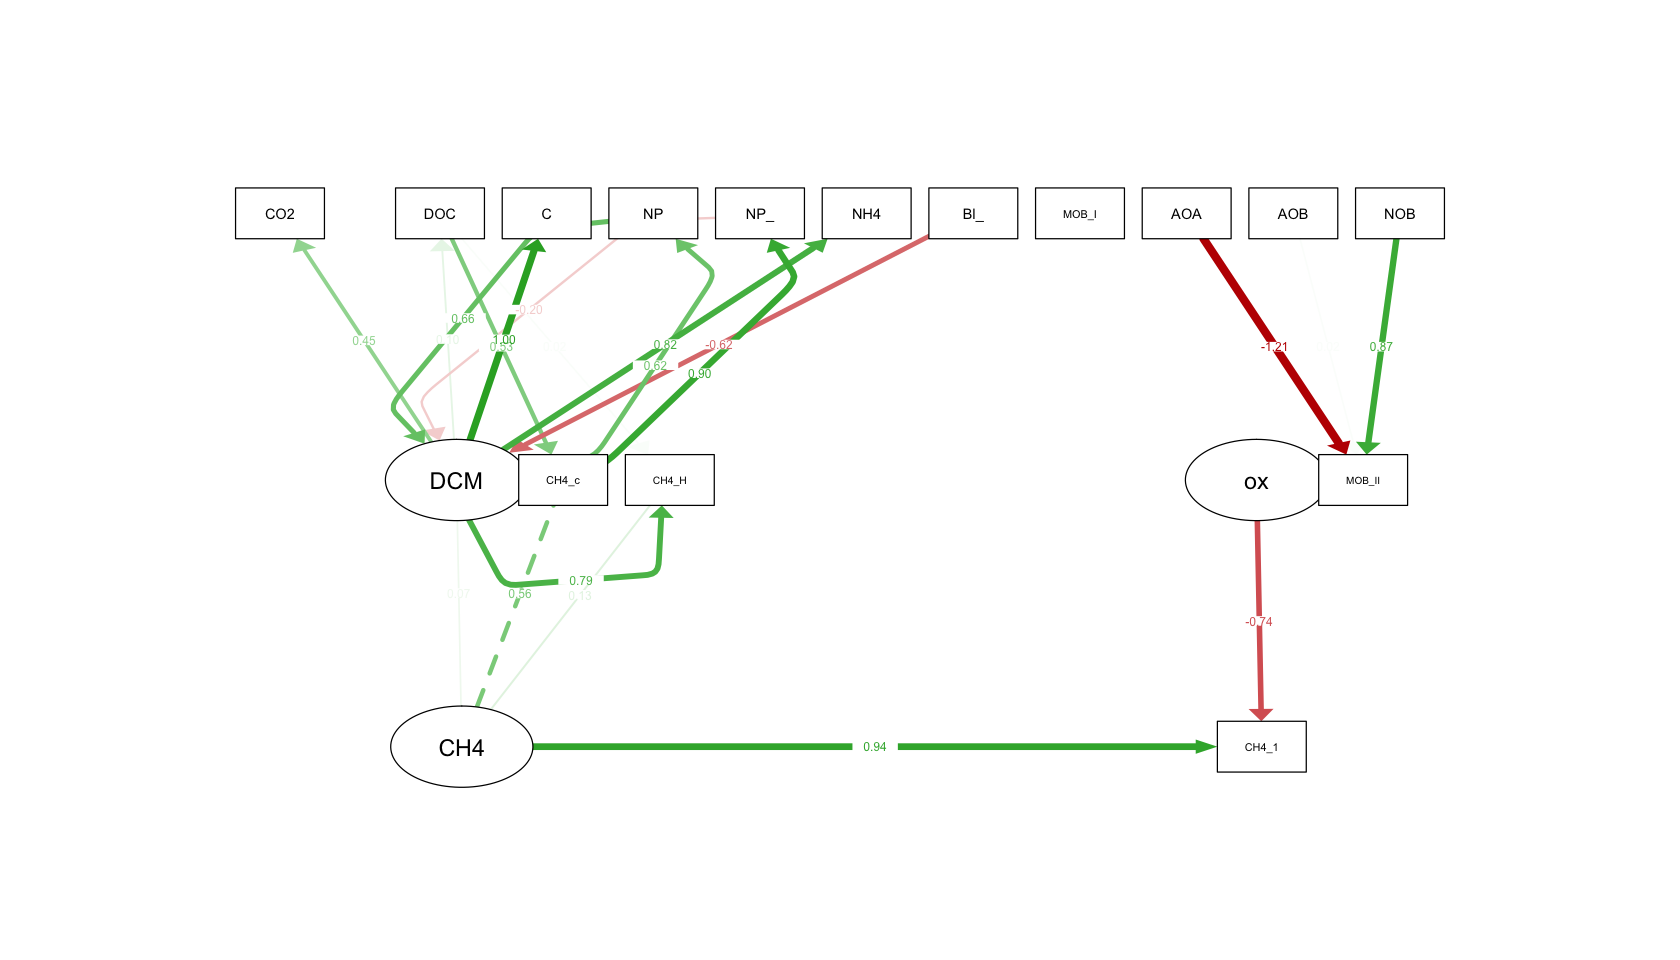

In [211]:
options(repr.plot.width=14, repr.plot.height=8) 

#######################
# To print add: filetype="pdf", filename="PrintSEM_test")
#######################

#semPaths(fit, "std", curvePivot = TRUE)
#semPaths(fit, "std", style = "lisrel")
#semPaths(fit, "std", style = "lisrel", layout='tree', exoCov=F, curvePivot = TRUE)

#semPaths(fit, "std", layout='tree3', residuals=FALSE, exoCov=F, edge.label.cex = 0.8)#, centerLevels=FALSE)

semPaths(fit, "std", style = "lisrel", layout='tree2', optimizeLatRes=TRUE, residuals=FALSE, 
         curvePivot = TRUE, exoCov=F)#, filetype="pdf", filename="PrintSEM_test_CO2")#, label.scale=F, node.height=10)


# semPaths(fit, "std", style = "lisrel", layout='tree3', layoutSplit=TRUE)
# semPaths(fit, "std", style = "lisrel", groups="latents", pastel=TRUE)
#semPaths(fit, "std", "Estimates", curvePivot = TRUE)

# Get corrgram for guilds & soils for covariates 

In [295]:
guild_d_names <- names(Guild_CH4_d)
drop <-c("NO2_pw", "NO3_pw", "NH3_pw", "NH4_N.1", "NO3_N.1")
keep <- guild_d_names[!guild_d_names %in% drop]
keep
Guild_CH4_d <- Guild_CH4_d[keep]

[1] "Sample"      "CH4_ug_m2_h" "CO2_mg_m2_h" "H2O_FPS"     "CH4_CO2"    
 [6] "NO3_N"       "NH4_N"       "DOC_mg_L"    "C"           "NP"         
[11] "NP_ext"      "P"           "CH4_logn1"   "C_g_m2"      "Bulk_dens"  
[16] "Salinity.x"  "CN"          "CH4_H2"      "CH4_ac"      "MOB_I"      
[21] "MOB_II"      "MOB_IIa"     "MeOB"        "AOA"         "AOB"        
[26] "NOB"         "Anamx"       "SOxB"        "SRB_syn"     "SRB"        
[31] "FeOB"        "FeRB"        "Actino"      "Chlorf"      "Firmic"

In [298]:
data <- Guild_CH4_d[,-1]
data <- data[!is.na(data$CH4_ug_m2_h),]
data <-data.matrix(data)
# corrplot(data.matrix(data))

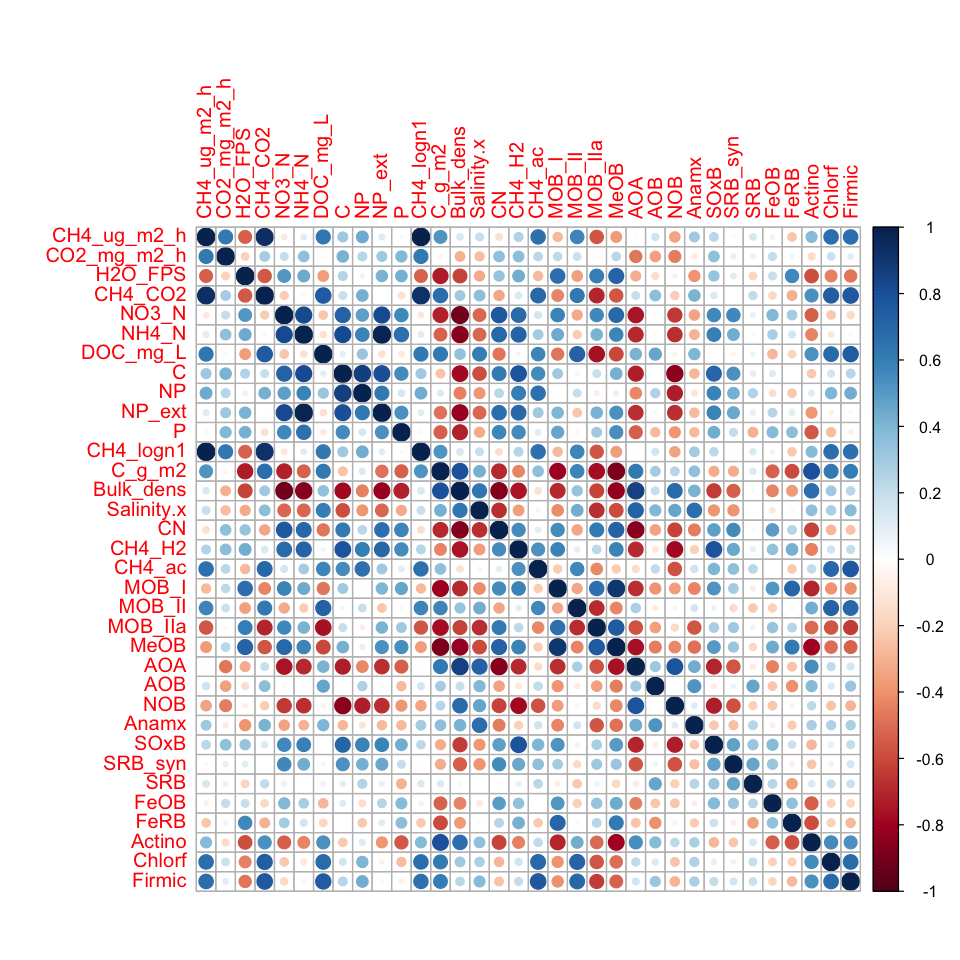

In [297]:
# make corrgram
options(repr.plot.width=8, repr.plot.height=8) 
corrplot(cor(data))

### a) small function for screening covariates

In [318]:
# Function for covariate screening (using subset of data)

corr_screen = function(data, feature_list){
    
    data_f <-data.frame(data)
    new_data <- data[feature_list]
    corrplot(cor(data.matrix(new_data)))
    
}

In [302]:
# Soil features only (always include?)
soil_feats <- c('CH4_ug_m2_h','CO2_mg_m2_h','H2O_FPS','CH4_CO2','NO3_N','NH4_N', 'DOC_mg_L','C','NP', 
                'NP_ext','P','CH4_logn1','C_g_m2','Bulk_dens','Salinity.x','CN')

In [311]:
# Define sub features to be compared 
test_feats <- c("CH4_ac", "MOB_IIa")
new_feats <- c(test_feats, soil_feats)
new_feats
# corr_screen

[1] "CH4_ac"      "MOB_IIa"     "CH4_ug_m2_h" "CO2_mg_m2_h" "H2O_FPS"    
 [6] "CH4_CO2"     "NO3_N"       "NH4_N"       "DOC_mg_L"    "C"          
[11] "NP"          "NP_ext"      "P"           "CH4_logn1"   "C_g_m2"     
[16] "Bulk_dens"   "Salinity.x"  "CN"

In [321]:
dataf <- data.frame(data)

In [324]:
 #dataf[test_feats]

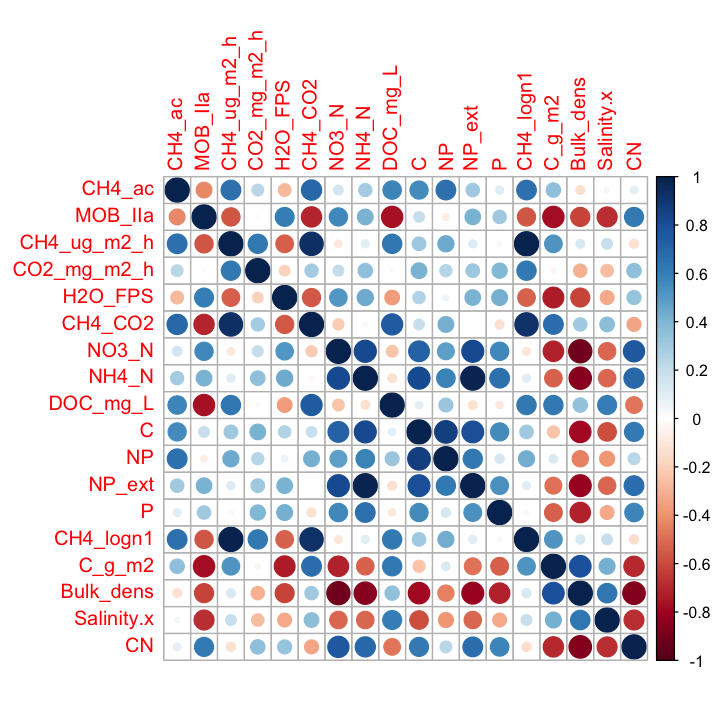

In [325]:
# test covariate function
options(repr.plot.width=6, repr.plot.height=6)
corr_screen(dataf, new_feats)